In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import cluster
import datetime as dt


import warnings
warnings.simplefilter(action='ignore', category=Warning)

from IPython.display import Audio
sound_file = '/Users/soso/Downloads/bell.mp3'
sound_file_1 = '/Users/soso/Downloads/Batterie de blague.mp3.mp3'

# Importation csv

In [2]:
mProduct = pd.read_csv('olist_7.csv')
mOrder = pd.read_csv('olist_6.csv')
mCard = pd.read_csv('olist_3.csv')
mReview = pd.read_csv('olist_5.csv')
mPayment = pd.read_csv('olist_4.csv')
mAdress = pd.read_csv('olist_2.csv')
mSeller = pd.read_csv('olist_8.csv')
mCustomer = pd.read_csv('olist_1.csv')


In [3]:
a = mProduct.columns
b = mOrder.columns
c = mCard.columns
d = mReview.columns
e = mPayment.columns
f = mAdress.columns
g = mSeller.columns
h = mCustomer.columns

aa = pd.DataFrame(a)
bb = pd.DataFrame(b)
cc = pd.DataFrame(c)
dd = pd.DataFrame(d)
ee = pd.DataFrame(e)
ff = pd.DataFrame(f)
gg = pd.DataFrame(g)
hh = pd.DataFrame(h)

frames = [aa, bb, cc,dd,ee,ff,gg,hh]

result = pd.concat(frames)
#result

# Creation variables

In [4]:
#Preparation Coord  Cust
print("----Before-----", mCustomer.shape)
mAdressCust = mAdress.groupby('geolocation_zip_code_prefix').mean()
mAdressCust = mAdressCust.reset_index()
mAdressCust = mAdressCust.rename(columns={'geolocation_zip_code_prefix': "customer_zip_code_prefix"})
mAdressCust = mAdressCust.rename(columns={'geolocation_lat': "cust_geo_lat"})
mAdressCust = mAdressCust.rename(columns={'geolocation_lng': "cust_geo_lng"})
mCustomer = pd.merge(mCustomer, mAdressCust, on="customer_zip_code_prefix")
print("----After-----", mCustomer.shape)
mCustomer.head(5)
#Preparation Coord Sel 
print("----Before-----", mSeller.shape)
mAdressSel = mAdress.groupby('geolocation_zip_code_prefix').mean()
mAdressSel = mAdressSel.reset_index()
mAdressSel = mAdressSel.rename(columns={'geolocation_zip_code_prefix': "seller_zip_code_prefix"})
mAdressSel = mAdressSel.rename(columns={'geolocation_lat': "sel_geo_lat"})
mAdressSel = mAdressSel.rename(columns={'geolocation_lng': "sel_geo_lng"})
mSeller = pd.merge(mSeller, mAdressSel, on="seller_zip_code_prefix")
print("----After-----", mSeller.shape)
mSeller.head(5)
#Préparaton Jointure
mNewOne= mCustomer[["customer_id", "customer_unique_id"]]
mNewTwo = mOrder[["order_id","customer_id"]]
mNew = pd.merge(mNewOne, mNewTwo, on="customer_id", how="left")


#---------m01------------

mNewOne= mCustomer[["customer_id", "customer_unique_id"]]
mNewTwo = mOrder[["order_id","customer_id"]]
mNew = pd.merge(mNewOne, mNewTwo, on="customer_id", how="left")
mOrderMonth = mOrder[["order_id","order_approved_at"]]
mOrderMonth = pd.merge(mNew, mOrderMonth, on="order_id")
mOrderMonth['Y_M_D'] = pd.to_datetime(mOrderMonth['order_approved_at'])
mOrderMonth.drop('customer_id', inplace=True, axis=1)
mOrderMonth.drop('order_id', inplace=True, axis=1)
mOrderMonth.drop('order_approved_at', inplace=True, axis=1)
mOrderMonth['Y_M_D'] = pd.to_datetime(mOrderMonth['Y_M_D'])
mOrderMonth["Epoch"] = (mOrderMonth['Y_M_D'] - dt.datetime(1970,1,1)).dt.total_seconds()
mOrderMonth = mOrderMonth.sort_values(by=['Epoch'], ascending=False)
mOrderMonth = mOrderMonth.dropna()
mOrderMonth.drop_duplicates(subset ="customer_unique_id",keep ="first", inplace = True)
mOrderMonth["Epoch_now"] = 1536019200
mOrderMonth["Epoch_diff"] = mOrderMonth["Epoch_now"] - mOrderMonth["Epoch"]
mOrderMonth["Epoch_diff_Min"] = mOrderMonth["Epoch_diff"]/60
mOrderMonth["Epoch_diff_hour"] = mOrderMonth["Epoch_diff_Min"]/60
mOrderMonth["Epoch_diff_day"] = mOrderMonth["Epoch_diff_hour"]/24
mOrderMonth["Epoch_"]  = round(mOrderMonth["Epoch_diff_day"] )
mOrderMonth = mOrderMonth[["customer_unique_id","Epoch_"]]
mOrderMonth
m25 = mOrderMonth.copy()
m01T = m25.copy()


#---------m02------------

#Lat - Neutre 1 
m13 = mCustomer[["cust_geo_lat","customer_unique_id"]]
m13.drop_duplicates(subset ="customer_unique_id",keep ="first", inplace = True)
m01Neutre = m13.copy()
m02T = m01Neutre.copy()

#---------m03------------
#Lng - Neutre 2
m14 = mCustomer[["cust_geo_lng","customer_unique_id"]]
m14.drop_duplicates(subset ="customer_unique_id",keep ="first", inplace = True)
m02Neutre = m14.copy()
m03T = m02Neutre.copy()

#---------m04------------
m1 = mOrder[["order_id","order_purchase_timestamp","order_delivered_customer_date"]]
mDeliveryTime = pd.merge(mOrder, mCustomer, on="customer_id")
mDeliveryTime = mDeliveryTime[["order_id","order_purchase_timestamp","order_delivered_customer_date","customer_unique_id"]]
new = mDeliveryTime["order_purchase_timestamp"].str.split(" ", n = 1, expand = True)
mDeliveryTime["order_one"]= new[0]
new = mDeliveryTime["order_delivered_customer_date"].str.split(" ", n = 1, expand = True)
mDeliveryTime["order_two"]= new[0]
mDeliveryTime.drop('order_purchase_timestamp', inplace=True, axis=1)
mDeliveryTime.drop('order_delivered_customer_date', inplace=True, axis=1)
mDeliveryTime["Delivery_time"] = pd.to_datetime(mDeliveryTime.order_two) - pd.to_datetime(mDeliveryTime.order_one)
mDeliveryTime = mDeliveryTime[["customer_unique_id","Delivery_time"]]
mDeliveryTime["Delivery_time"] = mDeliveryTime["Delivery_time"].astype('timedelta64[D]').astype(float)
mDeliveryTime = mDeliveryTime.dropna()
mDeliveryTime = mDeliveryTime.sort_values(by=['Delivery_time'], ascending=True)
mDeliveryTime["Delivery_time"].describe()
m01Scal = mDeliveryTime.copy()
m04T = m01Scal.copy()



#---------m05------------
mNbCommande = mNew.copy()
mNbCommande = pd.DataFrame(data=mNbCommande["customer_unique_id"].value_counts())
mNbCommande = mNbCommande.reset_index()
mNbCommande = mNbCommande.rename(columns={'customer_unique_id': "order_Count"})
mNbCommande = mNbCommande.rename(columns={'index': "customer_unique_id"})
mNbProd = mCard[["order_id", "order_item_id"]]
mNbProd = mNbProd.sort_values(by=['order_item_id'], ascending=False)
mNbProd.drop_duplicates(subset ="order_id",keep ="first", inplace = True)
mNbProd = pd.merge(mNbProd, mNew, on="order_id")
mNbProd = mNbProd.rename(columns={'order_item_id': "Product_count"})
mNbProd.drop('order_id', inplace=True, axis=1)
mProduct_Order = pd.merge(mNbProd, mNbCommande, on="customer_unique_id")
mProduct_Order["Product_by_Order"] = mProduct_Order["Product_count"] / mProduct_Order["order_Count"]
mProduct_Order = mProduct_Order[['customer_unique_id', 'order_Count','Product_count','Product_by_Order',]]
mProduct_Order = mProduct_Order.sort_values(by=['customer_unique_id'], ascending=False)
m03Scal = mProduct_Order.copy()
m05T = m03Scal.copy()

#---------m06------------
#Nb Distance - Scal 4
mDistance = mNew[["order_id","customer_unique_id"]]
mDistance2 = mCard[["order_id","seller_id"]]
mDistance = pd.merge(mDistance, mDistance2, on="order_id", how="right")
mDistance = pd.merge(mDistance, mSeller, on="seller_id", how="left")
mDistance = pd.merge(mDistance, mCustomer, on="customer_unique_id", how="left")
mDistance = mDistance[["order_id","sel_geo_lat","sel_geo_lng","cust_geo_lat","cust_geo_lng",'customer_unique_id']]
mDistance.drop_duplicates(subset ="order_id",keep ="first", inplace = True)
def haversine_np(LatC, LngC, LatS, LngS):
    LatC, LngC, LatS, LngS = map(np.radians, [LatC, LngC, LngS, LatS])
    dlon = LngS - LatC ; dlat = LatS - LngC
    a = np.sin(dlat/2.0)**2 + np.cos(LatC) * np.cos(LatS) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km
mDistance["Distance"] = haversine_np (mDistance["sel_geo_lat"],mDistance["sel_geo_lng"],mDistance["cust_geo_lat"],mDistance["cust_geo_lng"])
mDistance = mDistance[["Distance", "customer_unique_id"]]
mDistance.drop_duplicates(subset ="customer_unique_id",keep ="first", inplace = True)
m04Scal = mDistance.copy()
m06T = m04Scal.copy()

#---------m07------------
#Nb Photo - Scal 5
m17 = pd.merge(mOrder, mCustomer, on="customer_id")
m17 = m17[["order_id","customer_unique_id"]]
m17 = pd.merge(m17, mCard, on="order_id")
m17 = m17[["order_id","customer_unique_id", "product_id"]]
m17 = pd.merge(m17, mProduct, on="product_id")
m17 = m17[["customer_unique_id", "product_photos_qty"]]
m17 = m17.groupby('customer_unique_id', as_index=False).mean()
m07T = m17.copy()


#---------m08------------
#Poids Moyen - Scal 6
m18 = pd.merge(mOrder, mCustomer, on="customer_id")
m18 = m18[["order_id","customer_unique_id"]]
m18 = pd.merge(m18, mCard, on="order_id")
m18 = m18[["order_id","customer_unique_id", "product_id"]]
m18 = pd.merge(m18, mProduct, on="product_id")
m18 = m18[["customer_unique_id", "product_weight_g"]]
m18 = m18.groupby('customer_unique_id', as_index=False).mean()
m08T = m18.copy()


#---------m09------------
#Desc - Scal 7
m19 = pd.merge(mOrder, mCustomer, on="customer_id")
m19 = m19 [["order_id","customer_unique_id"]]
m19 = pd.merge(m19 , mCard, on="order_id")
m19 = m19 [["order_id","customer_unique_id", "product_id"]]
m19 = pd.merge(m19 , mProduct, on="product_id")
m19 = m19 [["customer_unique_id", "product_description_lenght"]]
m19 = m19.groupby('customer_unique_id', as_index=False).mean()
m09T = m19.copy()

#---------m10------------
# Type Pay Sq - Scal 8
m20 = pd.merge(mOrder, mCustomer, on="customer_id")
m20 = m20 [["order_id","customer_unique_id"]]
m20 = pd.merge(m20, mPayment, on="order_id")
m20 = m20[["customer_unique_id","payment_sequential"]]
m20['payment_sequential_'] = np.where(m20['payment_sequential']!=1, 0, 1)
m20 =  m20.sort_values(by=['payment_sequential_'], ascending=True)
m20.drop_duplicates(subset ="customer_unique_id",keep ="first", inplace = True)
m20 = m20[["customer_unique_id","payment_sequential_"]]
m10T = m20.copy()

#---------m11------------
# Type Pay Instal - Scal 9
m21 = pd.merge(mOrder, mCustomer, on="customer_id")
m21 = m21 [["order_id","customer_unique_id"]]
m21 = pd.merge(m21, mPayment, on="order_id")
m21 = m21[["customer_unique_id","payment_installments"]]
m21['payment_installments_'] = np.where(m21['payment_installments']!=1, 0, 1)
m21 =  m21.sort_values(by=['payment_installments_'], ascending=True)
m21.drop_duplicates(subset ="customer_unique_id",keep ="first", inplace = True)
m21 = m21[["customer_unique_id","payment_installments_"]]
m11T = m21.copy()

#---------m12------------
# Review - Scal 10
mReview_mean = pd.read_csv('olist_5.csv')
mReview_mean.drop('review_id', inplace=True, axis=1)
mReview_mean.drop('review_comment_title', inplace=True, axis=1)
mReview_mean.drop('review_comment_message', inplace=True, axis=1)
mReview_mean.drop('review_creation_date', inplace=True, axis=1)
mReview_mean.drop('review_answer_timestamp', inplace=True, axis=1)
mReview_mean = pd.merge(mNew, mReview_mean, on="order_id")
mReview_mean.drop('order_id', inplace=True, axis=1)
mReview_mean = mReview_mean.groupby('customer_unique_id', as_index=False).mean()
mReview_mean = mReview_mean.rename(columns={'review_score': "review_score_mean"})
m09 = mReview_mean.copy()
m12T = m09.copy()

#---------m13------------
#Montant par commande - Scal 11
mMeanByOrder2 = mPayment.sort_values(by=['payment_sequential'], ascending=False)
mMeanByOrder2 = mMeanByOrder2[["order_id","payment_value"]]
mMeanByOrder3 = mMeanByOrder2.groupby("order_id").sum()
mMeanByOrder3 = mMeanByOrder3.reset_index()
mMeanByOrder3 = mMeanByOrder3.rename(columns={'payment_value': "payment_by_order"})
mMeanByOrder = pd.merge(mNew, mMeanByOrder3, on="order_id")
mMeanByOrder.drop('order_id', inplace=True, axis=1)
mMeanByOrder = mMeanByOrder.groupby('customer_unique_id').mean()
mMeanByOrder = mMeanByOrder.reset_index()
mMeanByOrder = mMeanByOrder.rename(columns={'payment_by_order': "mean_price_by_order"})
m13T = mMeanByOrder.copy()

#---------m14------------
#Prix moyen Article - Scal 12
mMeanForProduct = mCard[["order_id","product_id","price"]]
mMeanForProduct = pd.merge(mNew, mMeanForProduct, on="order_id")
mMeanForProduct = mMeanForProduct[["customer_unique_id","price"]]
mMeanForProduct = mMeanForProduct.groupby('customer_unique_id').mean()
mMeanForProduct = mMeanForProduct.reset_index()
mMeanForProduct = mMeanForProduct.rename(columns={'price': "mean_price_By_product"})
m14T = mMeanForProduct.copy()

#---------m15------------
#Frais moyen livraison - Scal 13
mMeanForfreight = mCard[["order_id","product_id","freight_value"]]
mMeanForfreight = pd.merge(mNew, mMeanForfreight, on="order_id")
mMeanForfreight = mMeanForfreight[["customer_unique_id","freight_value"]]
mMeanForfreight = mMeanForfreight.groupby('customer_unique_id').mean()
mMeanForfreight = mMeanForfreight.reset_index()
mMeanForfreight = mMeanForfreight.rename(columns={'freight_value': "mean_freight_value_By_product"})
m15T = mMeanForfreight.copy()

#---------m16------------
#Heure d'achat - Scal 14
mOrderHour = mOrder[["order_id","order_approved_at"]]
mOrderHour['order_approved_at'].astype(str).tolist()
mOrderHour.dtypes
new = mOrderHour["order_approved_at"].str.split(" ", n = 1, expand = True)
mOrderHour["HourMinY"]= new[1]
new = mOrderHour["HourMinY"].str.split(":", n = 2, expand = True)
mOrderHour["Hour"]= new[0]
mOrderHour.drop('order_approved_at', inplace=True, axis=1)
mOrderHour.drop('HourMinY', inplace=True, axis=1)
mOrderHour = pd.merge(mNew, mOrderHour, on="order_id") 
mOrderHour = mOrderHour.dropna()
mOrderHour['Hour'] = mOrderHour['Hour'].astype(str).astype(int)
mOrderHour = mOrderHour.groupby('customer_unique_id', as_index=False).mean()
m16T = mOrderHour.copy()

#---------m17------------
#Jour d'achat - One Hot 1
mOrderDay = mOrder[["order_id","order_approved_at"]]
mOrderDay = pd.merge(mNew, mOrderDay, on="order_id")
mOrderDay['order_approved_at'].astype(str).tolist()
mOrderDay.dtypes
new = mOrderDay["order_approved_at"].str.split(" ", n = 1, expand = True)
mOrderDay["Date"]= new[0]
mOrderDay["Date"] = mOrderDay["Date"].astype('datetime64[ns]')
mOrderDay.dtypes
mOrderDay['day_of_week'] = mOrderDay['Date'].dt.day_name()
mOrderDay.drop('order_approved_at', inplace=True, axis=1)
mOrderDay.drop('Date', inplace=True, axis=1)
mOrderDay.drop('order_id', inplace=True, axis=1)
mOrderDay = mOrderDay.dropna()
mOrderDay = mOrderDay.groupby('customer_unique_id')['day_of_week'].apply(lambda x: x.value_counts().index[0]).reset_index()
m17T = mOrderDay.copy()

#---------m18------------
#Mode paie le + utilisé - One Hot 3
mBestMeth = mPayment[["order_id","payment_type"]]
mBestMeth = pd.merge(mBestMeth, mNew, on="order_id")
mBestMeth.drop('order_id', inplace=True, axis=1)
mBestMeth = mBestMeth.dropna()
mBestMeth = mBestMeth.groupby('customer_unique_id')['payment_type'].apply(lambda x: x.value_counts().index[0]).reset_index()
m18T = mBestMeth.copy()

#---------m19------------
#Cat la + acheté - One Hot 4
mBestCat2 = mCard[["order_id","product_id"]]
mBestCat3 = mProduct[["product_id","product_category_name"]]
mBestCat = pd.merge(mNew, mBestCat2, on="order_id")
mBestCat = pd.merge(mBestCat, mBestCat3, on="product_id")
mBestCat['customer_unique_id'].value_counts()
mBestCat2 = mCard[["order_id","product_id"]]
mBestCat3 = mProduct[["product_id","product_category_name"]]
mBestCat = pd.merge(mNew, mBestCat2, on="order_id")
mBestCat = pd.merge(mBestCat, mBestCat3, on="product_id")
mBestCat.drop('product_id', inplace=True, axis=1)
mBestCat.drop('order_id', inplace=True, axis=1)
mBestCat = mBestCat.dropna()
mBestCat = mBestCat.groupby('customer_unique_id')['product_category_name'].apply(lambda x: x.value_counts().index[0]).reset_index()
mBestCat.replace("agro_industria_e_comercio", "Service", inplace=True)
mBestCat.replace("alimentos_bebidas", "Nourriture_boissons", inplace=True)
mBestCat.replace("alimentos", "Nourriture_boissons", inplace=True)
mBestCat.replace("artes_e_artesanato", "Divers", inplace=True)
mBestCat.replace("artes", "Culture", inplace=True)
mBestCat.replace("artigos_de_festas", "Maison", inplace=True)
mBestCat.replace("artigos_de_natal", "Maison", inplace=True)
mBestCat.replace("audio", "Electronique_informatique", inplace=True)
mBestCat.replace("automotivo", "Service", inplace=True)
mBestCat.replace("bebes", "Enfant", inplace=True)
mBestCat.replace("bebidas", "Nourriture_boissons", inplace=True)
mBestCat.replace("beleza_saude", "pharmacie_ beauté", inplace=True)
mBestCat.replace("cama_mesa_banho", "Mode", inplace=True)
mBestCat.replace("casa_conforto_2", "Maison", inplace=True)
mBestCat.replace("casa_conforto", "Maison", inplace=True)
mBestCat.replace("casa_construcao", "Service", inplace=True)
mBestCat.replace("cds_dvds_musicais", "Culture", inplace=True)
mBestCat.replace("cine_foto", "Culture", inplace=True)
mBestCat.replace("climatizacao", "Maison", inplace=True)
mBestCat.replace("consoles_games", "Electronique_informatique", inplace=True)
mBestCat.replace("construcao_ferramentas_construcao", "outils_construction", inplace=True)
mBestCat.replace("construcao_ferramentas_ferramentas", "outils_construction", inplace=True)
mBestCat.replace("construcao_ferramentas_iluminacao", "outils_construction", inplace=True)
mBestCat.replace("construcao_ferramentas_jardim", "outils_construction", inplace=True)
mBestCat.replace("construcao_ferramentas_seguranca", "outils_construction", inplace=True)
mBestCat.replace("cool_stuff", "Divers", inplace=True)
mBestCat.replace("dvds_blu_ray", "Culture", inplace=True)
mBestCat.replace("eletrodomesticos_2", "Maison", inplace=True)
mBestCat.replace("eletrodomesticos", "Maison", inplace=True)
mBestCat.replace("eletronicos", "Electronique_informatique", inplace=True)
mBestCat.replace("eletroportateis", "Maison", inplace=True)
mBestCat.replace("esporte_lazer", "sports_loisirs", inplace=True)
mBestCat.replace("fashion_bolsas_e_acessorios", "Mode", inplace=True)
mBestCat.replace("fashion_calcados", "Mode", inplace=True)
mBestCat.replace("ashion_esporte", "Mode", inplace=True)
mBestCat.replace("fashion_roupa_feminina", "Mode", inplace=True)
mBestCat.replace("fashion_roupa_infanto_juvenil", "Enfant", inplace=True)
mBestCat.replace("fashion_roupa_masculina", "Mode", inplace=True)
mBestCat.replace("fashion_underwear_e_moda_praia", "Mode", inplace=True)
mBestCat.replace("ferramentas_jardim", "Maison", inplace=True)
mBestCat.replace("flores", "Maison", inplace=True)
mBestCat.replace("fraldas_higiene", "Enfant", inplace=True)
mBestCat.replace("industria_comercio_e_negocios", "Service", inplace=True)
mBestCat.replace("informatica_acessorios", "Electronique_informatique", inplace=True)
mBestCat.replace("instrumentos_musicais", "Culture", inplace=True)
mBestCat.replace("la_cuisine", "Maison", inplace=True)
mBestCat.replace("livros_importados", "Culture", inplace=True)
mBestCat.replace("livros_interesse_geral", "Culture", inplace=True)
mBestCat.replace("livros_tecnicos", "Culture", inplace=True)
mBestCat.replace("malas_acessorios", "Mode", inplace=True)
mBestCat.replace("market_place", "Divers", inplace=True)
mBestCat.replace("moveis_colchao_e_estofado", "Maison", inplace=True)
mBestCat.replace("moveis_cozinha_area_de_servico_jantar_e_jardim", "Maison", inplace=True)
mBestCat.replace("moveis_decoracao", "Maison", inplace=True)
mBestCat.replace("moveis_escritorio", "Maison", inplace=True)
mBestCat.replace("moveis_quarto", "Maison", inplace=True)
mBestCat.replace("moveis_sala", "Maison", inplace=True)
mBestCat.replace("musica", "Culture", inplace=True)
mBestCat.replace("papelaria", "Divers", inplace=True)
mBestCat.replace("pc_gamer", "Electronique_informatique", inplace=True)
mBestCat.replace("pcs", "Electronique_informatique", inplace=True)
mBestCat.replace("perfumaria", "pharmacie_ beauté", inplace=True)
mBestCat.replace("pet_shop", "animaleries_vétérinaires", inplace=True)
mBestCat.replace("portateis_casa_forno_e_cafe", "Maison", inplace=True)
mBestCat.replace("portateis_cozinha_e_preparadores_de_alimentos", "Maison", inplace=True)
mBestCat.replace("relogios_presentes", "Divers", inplace=True)
mBestCat.replace("seguros_e_servicos", "Service", inplace=True)
mBestCat.replace("sinalizacao_e_seguranca", "Divers", inplace=True)
mBestCat.replace("tablets_impressao_imagem", "Service", inplace=True)
mBestCat.replace("telefonia_fixa", "téléphones_smartphones", inplace=True)
mBestCat.replace("telefonia", "téléphones_smartphones", inplace=True)
mBestCat.replace("utilidades_domesticas", "Service", inplace=True)
mBestCat.replace("brinquedos", "Enfant", inplace=True)
mBestCat.replace("fashion_esporte", "Mode", inplace=True)
m19T = mBestCat.copy()

#---------m20------------
# Type order_status - One Hot 5
m22 = pd.merge(mOrder, mCustomer, on="customer_id")
m22 = m22[["customer_unique_id","order_status"]]
m22['order_status'] = np.where(m22['order_status'] =="canceled", 0, 1)
m22 =  m22.sort_values(by=['order_status'], ascending=False)
m22.drop_duplicates(subset ="customer_unique_id",keep ="first", inplace = True)
m20T = m22.copy()

#---------m21------------
# Type City - One Hot 6
m15 = mCustomer[["customer_unique_id","customer_city"]]
m15.drop_duplicates(subset ="customer_unique_id",keep ="first", inplace = True)
m21T = m15.copy()

#---------m22------------
# Type State - One Hot 7
m16 = mCustomer[["customer_unique_id","customer_state"]]
m16.drop_duplicates(subset ="customer_unique_id",keep ="first", inplace = True)
m22T = m16.copy()

#---------m23------------
# Type Mois - One Hot 8
mNewOne= mCustomer[["customer_id", "customer_unique_id"]]
mNewTwo = mOrder[["order_id","customer_id"]]
mNew = pd.merge(mNewOne, mNewTwo, on="customer_id", how="left")
mOrderMonth = mOrder[["order_id","order_approved_at"]]
mOrderMonth = pd.merge(mNew, mOrderMonth, on="order_id")
mOrderMonth['order_approved_at'].astype(str).tolist()
new = mOrderMonth["order_approved_at"].str.split(" ", n = 1, expand = True)
mOrderMonth["Date"]= new[0]
mOrderMonth.drop('order_approved_at', inplace=True, axis=1)
mOrderMonth.drop('order_id', inplace=True, axis=1)
mOrderMonth.drop('customer_id', inplace=True, axis=1)
mOrderMonth['Date'].astype(str).tolist()
new = mOrderMonth["Date"].str.split("-", n = 2, expand = True)
mOrderMonth["Mois"] = new[1]
mOrderMonth.drop('Date', inplace=True, axis=1)
mOrderMonth["Mois"].replace("01", "Janvier", inplace=True)
mOrderMonth["Mois"].replace("02", "Fevrier", inplace=True)
mOrderMonth["Mois"].replace("03", "Mars", inplace=True)
mOrderMonth["Mois"].replace("04", "Avril", inplace=True)
mOrderMonth["Mois"].replace("05", "Mai", inplace=True)
mOrderMonth["Mois"].replace("06", "Juin", inplace=True)
mOrderMonth["Mois"].replace("07", "Juillet", inplace=True)
mOrderMonth["Mois"].replace("08", "Aout", inplace=True)
mOrderMonth["Mois"].replace("09", "Septembre", inplace=True)
mOrderMonth["Mois"].replace("10", "Octobre", inplace=True)
mOrderMonth["Mois"].replace("11", "Novembre", inplace=True)
mOrderMonth["Mois"].replace("12", "Decembre", inplace=True)
m23T = mOrderMonth.copy()

#---------m24------------
#Total prix - Scal 2
mTotal = mPayment.sort_values(by=['payment_sequential'], ascending=False)
mTotal.drop('payment_installments', inplace=True, axis=1)
mTotal.head(30)
mTotal['Total_pay'] = mTotal['payment_value'].groupby(mTotal['order_id']).transform('sum')
mTotal.drop('payment_sequential', inplace=True, axis=1)
mTotal.drop('payment_type', inplace=True, axis=1)
mTotal.drop('payment_value', inplace=True, axis=1)
mTotal.drop_duplicates(subset ="order_id",keep ="first", inplace = True)
mTotal = pd.merge(mTotal, mNew, on="order_id")
mTotal.drop('order_id', inplace=True, axis=1)
mTotal = mTotal.groupby('customer_unique_id').mean()
mTotal = mTotal.reset_index()
m24T = mTotal.copy()





----Before----- (99441, 5)
----After----- (99163, 7)
----Before----- (3095, 4)
----After----- (3088, 6)


<ipython-input-4-1b2e6de8b7f8>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m13.drop_duplicates(subset ="customer_unique_id",keep ="first", inplace = True)
<ipython-input-4-1b2e6de8b7f8>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m14.drop_duplicates(subset ="customer_unique_id",keep ="first", inplace = True)
<ipython-input-4-1b2e6de8b7f8>:246: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

# Creation DataFrame avec tout 

In [5]:
mAll = pd.merge(m01T, m02T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m03T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m04T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m05T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m06T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m07T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m08T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m09T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m10T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m11T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m12T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m13T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m14T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m15T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m16T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m17T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m18T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m19T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m20T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m21T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m22T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m23T, on="customer_unique_id", how="left")
mAll = pd.merge(mAll, m24T, on="customer_unique_id", how="left")
#mAll = pd.merge(mAll, m25T, on="customer_unique_id", how="left")
mAll.drop_duplicates(subset ="customer_unique_id",keep ="first", inplace = True)
mAll = mAll.reset_index()
mAll.drop('index', inplace=True, axis=1) 
mAll = mAll.dropna()

#---------m25------------
mAllNeutre = mAll[["cust_geo_lat","cust_geo_lng"]]

mAllNorth = mAllNeutre.copy()
mAllNorth = mAllNeutre["cust_geo_lat"]
mAllNorth = pd.DataFrame(mAllNorth)
mAllNorth = mAllNorth.drop(mAllNorth[mAllNorth.cust_geo_lat < -8.0000].index)
mAllNorth["LAT"] = "N"
mAllSouth = mAllNeutre.copy()
mAllSouth = mAllNeutre["cust_geo_lat"]
mAllSouth = pd.DataFrame(mAllSouth)
mAllSouth = mAllSouth.drop(mAllSouth[mAllSouth.cust_geo_lat > -21.0000].index)
mAllSouth["LAT"] = "S"
mAllCenterNS = mAllNeutre.copy()
mAllCenterNS = mAllNeutre["cust_geo_lat"]
mAllCenterNS = pd.DataFrame(mAllCenterNS)
mAllCenterNS = mAllCenterNS.drop(mAllCenterNS[mAllCenterNS.cust_geo_lat >= -8.0000].index)
mAllCenterNS = mAllCenterNS.drop(mAllCenterNS[mAllCenterNS.cust_geo_lat <= -21.0000].index)
mAllCenterNS["LAT"] = "C"
frames = [mAllCenterNS, mAllNorth, mAllSouth]
mALL_N_S = pd.concat(frames)

mAllEast = mAllNeutre.copy()
mAllEast = mAllNeutre["cust_geo_lng"]
mAllEast.describe()
mAllEast = pd.DataFrame(mAllEast)
mAllEast = mAllEast.drop(mAllEast[mAllEast.cust_geo_lng < -46.0000].index)
mAllEast["LNG"] = "E"
mAllWest = mAllNeutre.copy()
mAllWest = mAllNeutre["cust_geo_lng"]
mAllWest = pd.DataFrame(mAllWest)
mAllWest = mAllWest.drop(mAllWest[mAllWest.cust_geo_lng > -59.0000].index)
mAllWest["LNG"] = "W"
mAll_E_W = mAllNeutre.copy()
mAll_E_W = mAllNeutre["cust_geo_lng"]
mAll_E_W = pd.DataFrame(mAll_E_W)
mAll_E_W = mAll_E_W.drop(mAll_E_W[mAll_E_W.cust_geo_lng >= -46.0000].index)
mAll_E_W = mAll_E_W.drop(mAll_E_W[mAll_E_W.cust_geo_lng <= -59.0000].index)
mAll_E_W["LNG"] = "C"
frames = [mAllEast, mAllWest, mAll_E_W]
mAll_E_W = pd.concat(frames)
mAll_ESNS = mAll_E_W.join(mALL_N_S)

mAll_ESNS["Coord"] = mAll_ESNS["LNG"] + mAll_ESNS["LAT"]
mAll_ESNS = mAll_ESNS["Coord"]
mAll_ESNS = pd.DataFrame(mAll_ESNS)
mAll_ESNS.describe()
m25T = mAll_ESNS.copy()
mAll_ESNS = mAll_E_W.join(mALL_N_S)

mAll_ESNS["Coord"] = mAll_ESNS["LNG"] + mAll_ESNS["LAT"]
mAll_ESNS = mAll_ESNS["Coord"]
mAll_ESNS = pd.DataFrame(mAll_ESNS)

mAll = mAll.join(mAll_ESNS)


mAll_1 = mAll.copy()



In [6]:
m_R_F_M = pd.read_csv('m_R_F_M_brut.csv')

mAll_2 = pd.merge(mAll_1, m_R_F_M, on="customer_unique_id")
mAll_2.drop('cust_geo_lat', inplace=True, axis=1)
mAll_2.drop('cust_geo_lng', inplace=True, axis=1)
mAll_2.drop('Product_by_Order', inplace=True, axis=1)
mAll_2.drop('product_photos_qty', inplace=True, axis=1)
mAll_2.drop('order_status', inplace=True, axis=1)
mAll_2.drop('customer_city', inplace=True, axis=1)
mAll_2.drop('customer_state', inplace=True, axis=1)
mAll_2.drop('Mois', inplace=True, axis=1)
mAll_2.drop('Unnamed: 0', inplace=True, axis=1)
mAll_2.drop('product_weight_g', inplace=True, axis=1)
mAll_2.drop('product_description_lenght', inplace=True, axis=1)
mAll_2.drop('payment_sequential_', inplace=True, axis=1)
mAll_2.drop('payment_installments_', inplace=True, axis=1)
mAll_2.drop('mean_freight_value_By_product', inplace=True, axis=1)
mAll_2.drop('Hour', inplace=True, axis=1)
mAll_2.drop('day_of_week', inplace=True, axis=1)
mAll_2.drop('payment_type', inplace=True, axis=1)
mAll_2.drop('mean_price_By_product', inplace=True, axis=1)
mAll_2.drop('mean_price_by_order', inplace=True, axis=1)
mAll_2.drop('Delivery_time', inplace=True, axis=1)
mAll_2.drop('order_Count', inplace=True, axis=1)
mAll_2.drop('Epoch_', inplace=True, axis=1)
mAll_2.drop('Total_pay', inplace=True, axis=1)

mAll_2.replace("Electronique_informatique", "Hi_Tech", inplace=True)
mAll_2.replace("Maison", "Maison", inplace=True)
mAll_2.replace("pharmacie_ beauté", "Maison", inplace=True)
mAll_2.replace("sports_loisirs", "Culture_Loisir", inplace=True)
mAll_2.replace("Divers", "Divers", inplace=True)
mAll_2.replace("Nourriture_boissons", "Maison", inplace=True)
mAll_2.replace("Enfant", "Divers", inplace=True)
mAll_2.replace("Service", "Service_Outils", inplace=True)
mAll_2.replace("outils_construction", "Service_Outils", inplace=True)
mAll_2.replace("Mode", "Maison", inplace=True)
mAll_2.replace("téléphones_smartphones", "Hi_Tech", inplace=True)
mAll_2.replace("animaleries_vétérinaires", "Divers", inplace=True)
mAll_2.replace("Culture", "Culture_Loisir", inplace=True)

In [7]:
#mAll_2.to_csv('Prepare_donnée_brute.csv')

In [8]:
mAll_2

,customer_unique_id,Product_count,Distance,review_score_mean,product_category_name,Coord,Recenc_,Frequency_,Monetary_
0,24ac2b4327e25baf39f2119e4228976a,1.0,127.613379,5.0,Hi_Tech,CS,5.0,1,93.75
1,b701bebbdf478f5500348f03aff62121,1.0,9.999851,3.0,Maison,CS,5.0,1,33.23
2,5c58de6fb80e93396e2f35642666b693,2.0,10.400801,5.0,Maison,CS,5.0,1,510.96
3,7febafa06d9d8f232a900a2937f04338,1.0,404.666151,5.0,Maison,CC,5.0,1,61.29
4,7a22d14aa3c3599238509ddca4b93b01,1.0,15.642436,1.0,Divers,CS,5.0,1,73.10
...,...,...,...,...,...,...,...,...,...
91604,8d3a54507421dbd2ce0a1d58046826e0,1.0,209.555124,1.0,Maison,CS,700.0,1,133.46
91605,88bc832f104b6dd684a17dbb1b76e778,1.0,10.786333,1.0,Service_Outils,CS,700.0,1,114.77
91606,87776adb449c551e74c13fc34f036105,1.0,207.719412,5.0,Maison,ES,700.0,1,40.95
91607,b8b8726af116a5cfb35b0315ecef9172,1.0,385.418913,1.0,Culture_Loisir,ES,700.0,1,35.61


In [9]:
from IPython.display import Audio
sound_file = '/Users/soso/Downloads/bell.mp3'

In [10]:
Audio(sound_file, autoplay=True)

In [17]:
def GraphNum(data, x,y,string):  
    plt.figure(figsize=(10, 10))
    ax = sns.barplot(x=x, y=y, data=data, orient='h')
    plt.title(string, fontsize=30)
    plt.xticks(fontsize=20, rotation=30)
    plt.yticks(fontsize=20, rotation=30)
    return plt

In [20]:
print(2688+245)

2933


In [21]:
d = {'Frequency': [88676, 2933], 'item': ["Une fois", "2 fois ou plus "]}
df = pd.DataFrame(data=d)

<module 'matplotlib.pyplot' from '/Users/soso/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

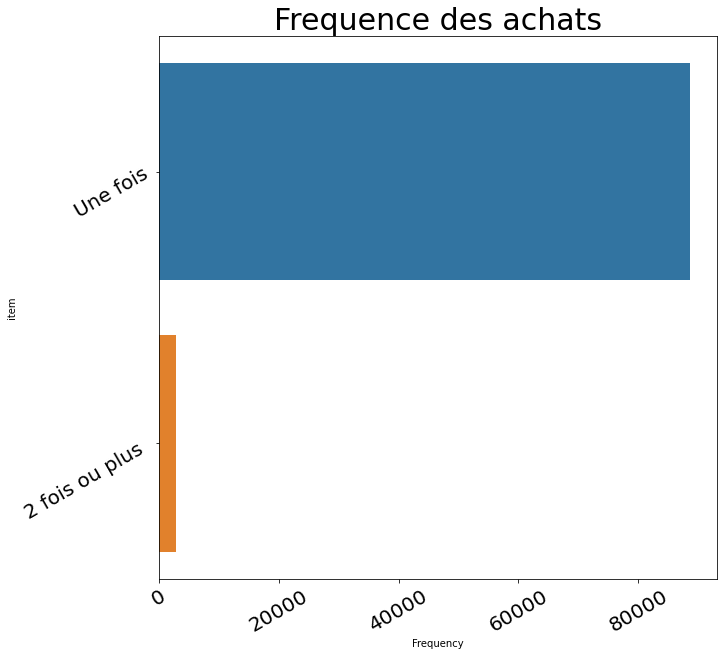

In [22]:
GraphNum(df,"Frequency", "item", "Frequence des achats" )

In [23]:
print(2933+88676)

91609


In [24]:
88676/91609

0.967983495071445